In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import astropy as ap
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

/tmp/ipykernel_3876/1306964728.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
D = np.genfromtxt('jla_lcparams.txt', comments='#')
zcmb,zhel, mb, dmb  = D[:,1],D[:,2], D[:,4],D[:,5]  

In [3]:
from scipy.optimize import minimize

In [4]:
def model(params, z):
    Olambda , m , Ho = params       
    cosmo = FlatLambdaCDM(H0=Ho* u.km / u.s / u.Mpc, Tcmb0=2.725* u.K, Om0=1-Olambda)
    m_effModel = []     
    for i in range(len(z)):        
        dl = cosmo.luminosity_distance(z[i])
        m_effModel.append(m + 5*math.log10(dl.value*1e5))        
    return m_effModel

In [5]:
def chi_square(params, z_obs, m_obs, dmb):                        
    m_model = model(params, z_obs)
    chi_square = np.sum(((m_obs - m_model) / dmb) ** 2)
    return chi_square

In [6]:
guess = [0.5, -15.0, 65.0]
result = minimize(chi_square, guess, args = (zcmb, mb, dmb),bounds= ((0, 1),(None,None), (0, None)))
Olambda = result.x
print(f"EL valor de Omega_Lambda es de {Olambda[0]}")
print(f"EL valor de M es de {Olambda[1]}")
print(f"EL valor de H0 es de {Olambda[2]}")

EL valor de Omega_Lambda es de 0.5215672217044156
EL valor de M es de -19.224273846824097
EL valor de H0 es de 65.14092074916543


In [7]:
x1,Constante = D[:,6], D[:,8]  
M_B = -19.224273846824097
cosmox1 = FlatLambdaCDM(H0=70* u.km / u.s / u.Mpc, Tcmb0=2.725* u.K, Om0=0.3)
mu,muObs = [],[]     
for i in range(len(zcmb)):        
    dl = cosmox1.luminosity_distance(zcmb[i])
    mu.append(5*math.log10(dl.value*1e5)) 
    muObs.append(mb[i]-(M_B-x1[i]-Constante[i]))




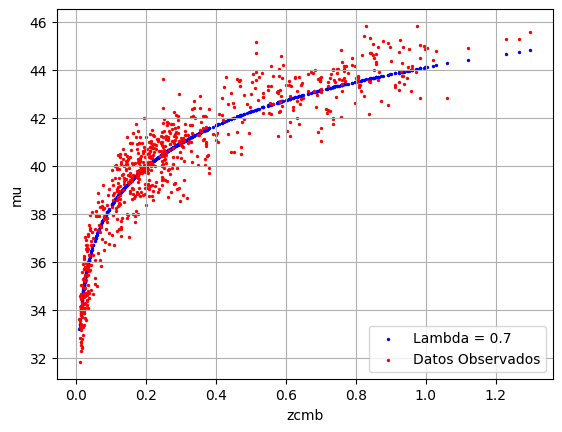

In [8]:
plt.scatter(zcmb,mu,color='b', sizes = [2])
plt.scatter(zcmb,muObs,color='r', sizes = [2])
plt.legend(["Lambda = 0.7","Datos Observados", "Mediciones Observadas"], loc="lower right")
plt.grid()
plt.xlabel('zcmb')
plt.ylabel('mu')
plt.show()

<h1>Matriz de Covarinza<h1>

In [9]:
solarMB = D[:,10] 
A = [mb,x1,Constante]
ETA = np.transpose(A)


In [16]:
def dKronecker(i,j):
    boolean = 0
    if(i==j):boolean=1
    return boolean
#A0,A1,A2,A = [],[],[],[]
A = []
    
alpha = 1
beta = 1
for i in range(len(solarMB)):
    Aux0,Aux1,Aux2,AuxA = [],[],[],[]
    AuxA = []
    for j in range(len(solarMB)):
        Aux0.append(dKronecker(3*i,j+0))        
        Aux1.append(dKronecker(3*i,j+1))
        Aux2.append(dKronecker(3*i,j+2))
        AuxA.append(Aux0[j]+alpha*Aux1[j]-beta*Aux2[j])
    #A0.append(Aux0)
    #A1.append(Aux1)
    #A2.append(Aux2)
    A.append(AuxA)
A = np.array(A)  



mu = A*eta-Mb

In [17]:
muAux = np.zeros((740, 3))
    
for i in range(len(solarMB)):
    for j in range(3):
        for k in range(len(solarMB)):
            muAux[i][j] += A[i][k]*ETA[k][j]